In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

from keras.callbacks import EarlyStopping
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as K

In [2]:
dataset = pd.read_csv("Datasets1/combined_report_Karpos.csv")

In [4]:
dataset = dataset.drop(columns = ["ozone", "precipAccumulation", "precipIntensity", "precipProbability", "pressure", "visibility", "CO", "NO2", "O3", "PM10", "SO2", "AQI"])

In [5]:
dataset_bez_stringovi = dataset.drop(columns = ["icon", "precipType", "summary"])

In [6]:
dataset_bez_stringovi

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM25
0,13.00,1.00,8.12,0.54,22.29,1420106400,0.0,30.0,8.03,8.03,17.7000
1,18.36,1.00,8.12,0.48,25.14,1420110000,0.0,30.0,5.67,5.67,15.9800
2,17.03,1.00,8.97,0.50,25.14,1420117200,0.0,30.0,7.26,7.26,16.6800
3,14.55,1.00,10.55,0.57,23.56,1420120800,0.0,30.0,8.03,8.03,19.2900
4,7.98,1.00,7.16,0.57,19.86,1420128000,0.0,28.0,11.16,11.16,26.2600
...,...,...,...,...,...,...,...,...,...,...,...
23635,32.20,0.19,28.07,0.72,36.10,1546117200,0.0,45.0,4.95,4.65,21.6945
23636,32.39,0.19,27.98,0.84,32.39,1546120800,0.0,121.0,4.63,0.05,51.1172
23637,32.06,0.35,27.83,0.84,32.06,1546124400,0.0,111.0,4.70,0.00,76.4318
23638,33.35,0.75,28.66,0.83,33.35,1546128000,0.0,112.0,4.68,0.00,99.2078


In [7]:
train_dataset = dataset_bez_stringovi[:-2000]

In [8]:
train_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM25
0,13.00,1.00,8.12,0.54,22.29,1420106400,0.0,30.0,8.03,8.03,17.7000
1,18.36,1.00,8.12,0.48,25.14,1420110000,0.0,30.0,5.67,5.67,15.9800
2,17.03,1.00,8.97,0.50,25.14,1420117200,0.0,30.0,7.26,7.26,16.6800
3,14.55,1.00,10.55,0.57,23.56,1420120800,0.0,30.0,8.03,8.03,19.2900
4,7.98,1.00,7.16,0.57,19.86,1420128000,0.0,28.0,11.16,11.16,26.2600
...,...,...,...,...,...,...,...,...,...,...,...
21635,91.25,0.19,51.79,0.26,91.25,1533999600,2.0,41.0,0.00,2.24,22.9704
21636,89.44,0.19,51.79,0.28,89.44,1534003200,1.0,290.0,0.00,2.24,22.9704
21637,84.04,1.00,51.79,0.33,84.04,1534006800,0.0,350.0,0.00,6.93,22.9704
21638,78.64,1.00,53.59,0.42,78.64,1534010400,0.0,0.0,0.00,0.00,22.9704


In [9]:
test_dataset = dataset_bez_stringovi[-2000:]

In [10]:
test_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM25
21640,75.02,1.00,53.59,0.47,75.02,1534017600,0.0,0.0,0.00,0.00,22.9704
21641,69.64,1.00,57.20,0.65,69.64,1534021200,0.0,0.0,0.00,0.00,22.9704
21642,67.83,1.00,57.20,0.69,67.83,1534024800,0.0,0.0,0.00,0.00,22.9704
21643,67.83,1.00,57.20,0.69,67.83,1534028400,0.0,150.0,0.00,2.24,22.9704
21644,64.23,1.00,57.20,0.78,64.23,1534032000,0.0,0.0,0.00,0.00,22.9704
...,...,...,...,...,...,...,...,...,...,...,...
23635,32.20,0.19,28.07,0.72,36.10,1546117200,0.0,45.0,4.95,4.65,21.6945
23636,32.39,0.19,27.98,0.84,32.39,1546120800,0.0,121.0,4.63,0.05,51.1172
23637,32.06,0.35,27.83,0.84,32.06,1546124400,0.0,111.0,4.70,0.00,76.4318
23638,33.35,0.75,28.66,0.83,33.35,1546128000,0.0,112.0,4.68,0.00,99.2078


In [11]:
train_data = train_dataset.iloc[:,10].values
test_data = test_dataset.iloc[:,10].values

In [12]:
test_data

array([ 22.9704,  22.9704,  22.9704, ...,  76.4318,  99.2078, 113.508 ])

In [14]:
scaler = MinMaxScaler() #default od 0 do 1
train_data = np.reshape(train_data, (21640,1))
train_data = scaler.fit_transform(train_data)

In [15]:
test_data = np.reshape(test_data, (2000,1))
inputs = scaler.transform(test_data)

In [16]:
train_data = np.reshape(train_data, (21640, 1, 1))
inputs = np.reshape(inputs, (2000, 1, 1))

In [17]:
x_train = train_data[:-1]
y_train = train_data[1:]

In [18]:
regressor1 = Sequential()
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(Dense(units = 1))

In [19]:
regressor1.compile(optimizer = 'adam', 
                  loss = 'mean_squared_error')

In [20]:
regressor1.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
677/677 [==============================] - 11s 5ms/step - loss: 0.0097
Epoch 2/50
677/677 [==============================] - 4s 5ms/step - loss: 0.0060
Epoch 3/50
677/677 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 4/50
677/677 [==============================] - 4s 5ms/step - loss: 0.0059
Epoch 5/50
677/677 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 6/50
677/677 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 7/50
677/677 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 8/50
677/677 [==============================] - 4s 5ms/step - loss: 0.0058
Epoch 9/50
677/677 [==============================] - 4s 5ms/step - loss: 0.0058
Epoch 10/50
677/677 [==============================] - 4s 6ms/step - loss: 0.0058
Epoch 11/50
677/677 [==============================] - 4s 6ms/step - loss: 0.0058
Epoch 12/50
677/677 [==============================] - 4s 6ms/step - loss: 0.0058
Epoch 13/50
677/677 [===

In [21]:
predicted = regressor1.predict(inputs)
predicted = predicted.reshape(2000,1)
predicted = scaler.inverse_transform(predicted)

In [22]:
rmse = math.sqrt(mean_squared_error(test_data, predicted))
print('Test Root Mean Squared Error:', rmse)
mae = mean_absolute_error(test_data, predicted)
print('Test Mean Absolute Error:', mae)

Test Root Mean Squared Error: 5.776112276019329
Test Mean Absolute Error: 2.888993474504851


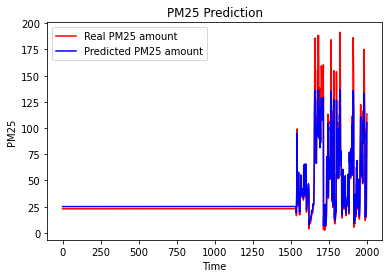

In [24]:
plt.figure()
plt.plot(test_data, color='red', label = 'Real PM25 amount')
plt.plot(predicted, color='blue', label = 'Predicted PM25 amount')
plt.title('PM25 Prediction')
plt.xlabel('Time')
plt.ylabel('PM25')
plt.legend()
plt.show()

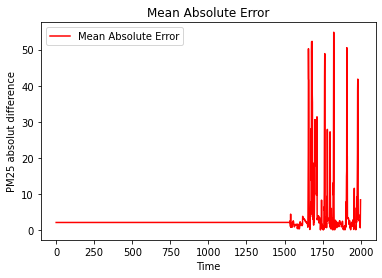

In [25]:
plt.figure()
plt.plot(np.abs(test_data - predicted), color='red', label = 'Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('Time')
plt.ylabel('PM25 absolut difference')
plt.legend()
plt.show()